In [21]:
import json
import matplotlib.pyplot as plt

Graph bias vs polarisation

In [26]:
data = []

file = 'data/bias-vs-polarisation/data-p{}-c{}-plat0-rec0.json'

for p, c in ((0.25, 0.1), (0.5, 0.1), (0.75, 0.1), (0.5, 0.3), (0.5, 0.5)):
	with open(file.format(p, c), 'r') as f:
		data.append(json.load(f)['data'])

In [33]:
def plot_avg(data, ax):
	bs, ps = zip(*list(data.items()))
	bs = [float(b) for b in bs]

	avg_ps = []
	for p in ps:
		avg_ps.append(sum(p) / len(p))
	
	ax.plot(bs, avg_ps)

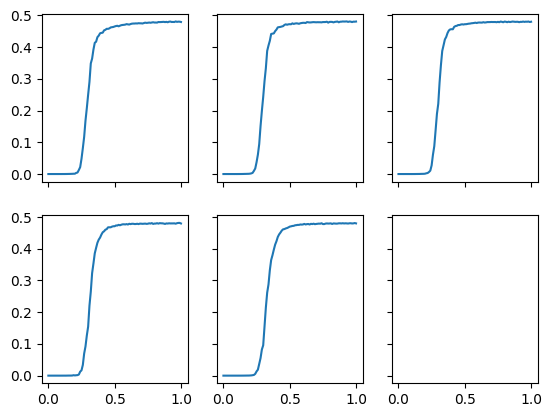

In [37]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

plot_avg(data[0], axs[0][0])
plot_avg(data[1], axs[0][1])
plot_avg(data[2], axs[0][2])
plot_avg(data[3], axs[1][0])
plot_avg(data[4], axs[1][1])

In [38]:
def variance(lst):
	avg = sum(lst) / len(lst)
	return sum([(x - avg)**2 for x in lst]) / len(lst)

def plot_var(data, ax):
	bs, ps = zip(*list(data.items()))
	bs = [float(b) for b in bs]

	avg_ps = []
	for p in ps:
		avg_ps.append(variance(p))
	
	ax.plot(bs, avg_ps)

In [ ]:
fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)

plot_var(data[0], axs[0][0])
plot_var(data[1], axs[0][1])
plot_var(data[2], axs[0][2])
plot_var(data[3], axs[1][0])
plot_var(data[4], axs[1][1])

Graph fraction of agents conforming to platform's opinion against level of platform bias

In [24]:

file = 'data/{}-vs-polarisation/data-b{}-p0.5-c0.1-{}1.json'

platform_data = []
rec_data = []

for b in [0, 0.25, 0.5, 0.75]:
	with open(file.format('platform', b, 'rec'), 'r') as f:
		platform_data.append(json.load(f)['data'])

	with open(file.format('rec', b, 'platform'), 'r') as f:
		rec_data.append(json.load(f)['data'])
	

# data0['data']

In [6]:
def get_data(data):
	xs = []
	ys = []
	for key, val in data.items():
		xs.append(float(key))
		y = []
		for v in val:
			y.append(float(v[1] if v[0] == 1 else v[2]))
		ys.append(sum(y) / len(y))
	return xs, ys

In [17]:
def plot(data, xlabel):
	xs = []
	ys = []

	for d in data:
		x, y = get_data(d)
		xs.append(x)
		ys.append(y)

	for i, b in enumerate([0, 0.25, 0.5, 0.75]):
		plt.plot(xs[i], ys[i], label=f'b={b}')

	plt.legend()
	plt.xlabel(xlabel)
	plt.ylabel('Average fraction conforming to platform')

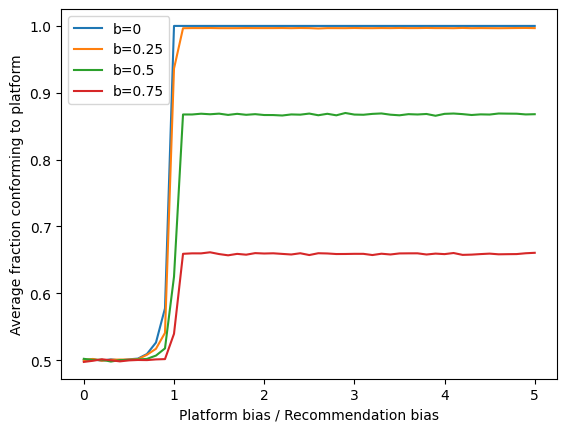

In [18]:
plot(platform_data, 'Platform bias / Recommendation bias')

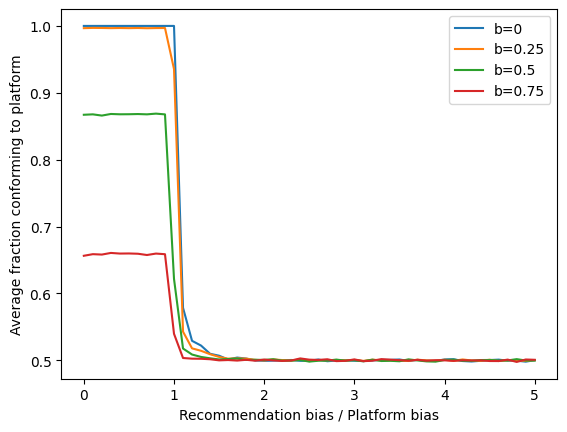

In [19]:
plot(rec_data, 'Recommendation bias / Platform bias')